Given a table of ZTs from this paper: https://www.nature.com/articles/s41524-022-00897-2#data-availability 

In [1]:
import pandas as pd

data = {
    "temperature(K)": [323, 428, 821, 724, 529, 629],
    "seebeck_coefficient(μV/K)": [-231, -270, -264, -298, -308, -320],
    "electrical_conductivity(S/m)": [22500, 24079, 13026, 12039, 17961, 13224],
    "thermal_conductivity(W/mK)": [2.17, 1.58, 1.31, 1.19, 1.30, 1.19],
    "power_factor(W/mK2)": [0.00120, 0.00175, 0.00091, 0.00107, 0.00170, 0.00136],
    "ZT": [0.18, 0.48, 0.57, 0.65, 0.71, 0.74],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Optionally, save it to a CSV file
#df.to_csv("output_table.csv", index=False)


   temperature(K)  seebeck_coefficient(μV/K)  electrical_conductivity(S/m)  \
0             323                       -231                         22500   
1             428                       -270                         24079   
2             821                       -264                         13026   
3             724                       -298                         12039   
4             529                       -308                         17961   
5             629                       -320                         13224   

   thermal_conductivity(W/mK)  power_factor(W/mK2)    ZT  
0                        2.17              0.00120  0.18  
1                        1.58              0.00175  0.48  
2                        1.31              0.00091  0.57  
3                        1.19              0.00107  0.65  
4                        1.30              0.00170  0.71  
5                        1.19              0.00136  0.74  


In [ ]:
import numpy as np

# Convert DataFrame columns to NumPy arrays
temperature = np.array(df["temperature(K)"])
ZT = np.array(df["ZT"])

# Calculate cold and hot temperatures as NumPy arrays
T_cold = temperature - 50
T_hot = temperature + 50

# Calculate efficiency (η) as a NumPy array using the formula
sqrt_term = np.sqrt(1 + ZT)
efficiency = ((T_hot - T_cold) / T_hot) * ((sqrt_term - 1) / (sqrt_term + (T_cold / T_hot)))

# Add the new columns back to the DataFrame
df["cold_temperature(K)"] = T_cold
df["hot_temperature(K)"] = T_hot
df["max_efficiency"] = efficiency

# Display the updated DataFrame
print(df)

# Optionally, save the updated DataFrame to a CSV file
#df.to_csv("output_table_with_efficiency_numpy.csv", index=False)


   temperature(K)  seebeck_coefficient(μV/K)  electrical_conductivity(S/m)  \
0             323                       -231                         22500   
1             428                       -270                         24079   
2             821                       -264                         13026   
3             724                       -298                         12039   
4             529                       -308                         17961   
5             629                       -320                         13224   

   thermal_conductivity(W/mK)  power_factor(W/mK2)    ZT  cold_temperature(K)  \
0                        2.17              0.00120  0.18                  273   
1                        1.58              0.00175  0.48                  378   
2                        1.31              0.00091  0.57                  771   
3                        1.19              0.00107  0.65                  674   
4                        1.30              0.001

/var/folders/pb/8kt5d0555_945xfw04y2j0000000gn/T/ipykernel_28524/941398660.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


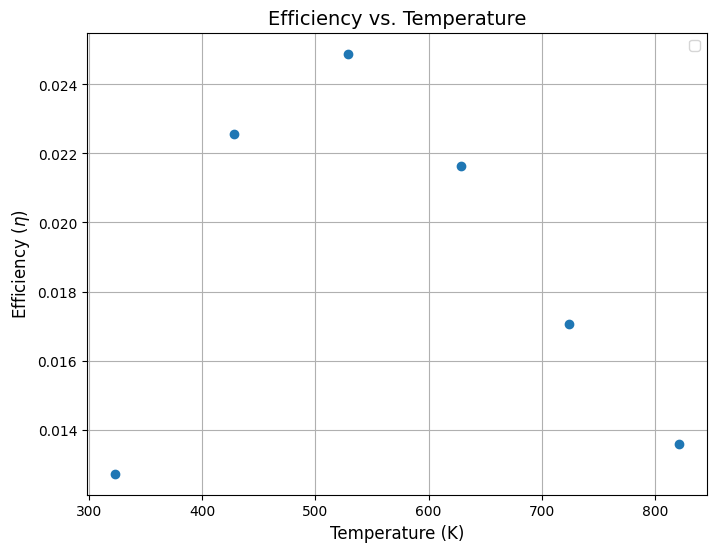

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(temperature, efficiency)
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("Efficiency ($\eta$)", fontsize=12)
plt.title("Efficiency vs. Temperature", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [2]:
S = -231e-6  # Seebeck coefficient in V/K
sigma = 22500  # Electrical conductivity in S/m
kappa = 2.17  # Thermal conductivity in W/mK
A = 10.0e-6  # Cross-sectional area in m^2
L = 5e-3  # Length in m
Delta_T = 100  # Temperature gradient in K


$R =\frac{L}{\sigma \ * A}$

In [3]:
R_PbTe= L/(sigma*A)
print(R_PbTe)

0.022222222222222223


Open circuit voltage
$V =\Delta_T * S$

In [8]:
V_OC = S * Delta_T
print(V_OC)

-0.0231


Power Output:
$P=I2⋅RL=V2⋅RL(Rint+RL)2P = I^2 \cdot R_L = \frac{V^2 \cdot R_L}{(R_{\text{int}} + R_L)^2}$
Optimization: Maximize PP by impedance matching $(RL=RintR_L = R_{\text{int}})$


In [10]:
import numpy as np
# Load resistance range
R_L_values = np.linspace(0.01 * R_PbTe, 10 * R_PbTe, 500)

# Calculate electrical parameters
I_values = V_OC / (R_PbTe + R_L_values)  # Current
P_values = I_values**2 * 2*R_L_values  # Power
V_L_values = I_values * 2*R_L_values  # Voltage across the load

# Optimal conditions
max_power = np.max(P_values)
optimal_RL = R_L_values[np.argmax(P_values)]
optimal_current = I_values[np.argmax(P_values)]
optimal_voltage = V_L_values[np.argmax(P_values)]


Analysis Results
**Maximum Power Output:** 0.0060 W
**Optimal Load Resistance (R_L):** 0.0220 Ω
**Voltage at Optimal R_L:** -0.0115 V
**Current at Optimal R_L:** -0.5221 A


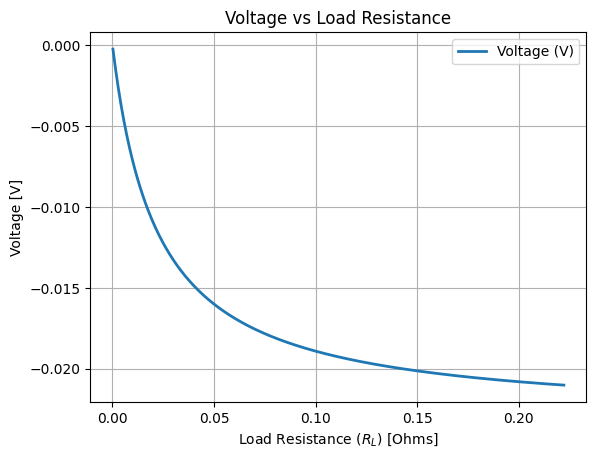

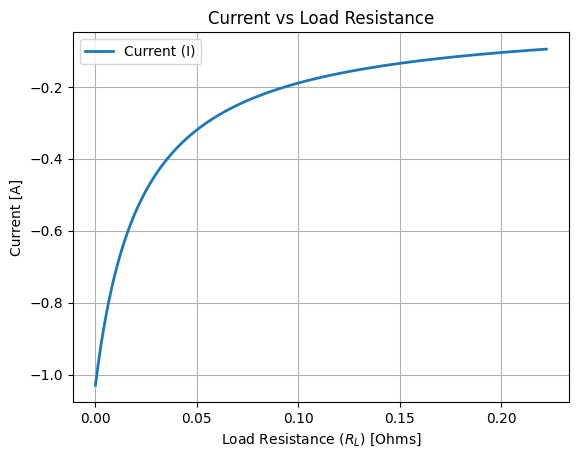

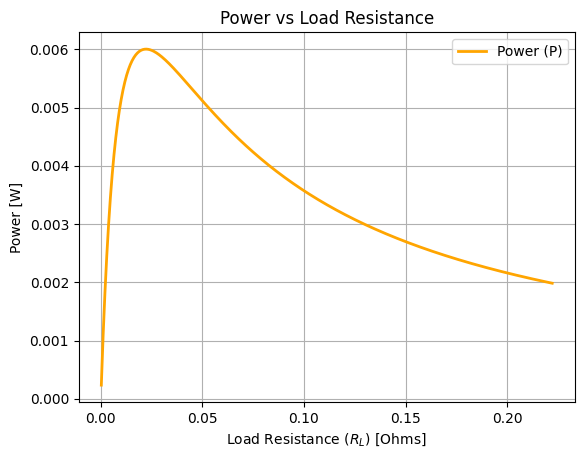

: 

In [ ]:
import matplotlib.pyplot as plt\
# Voltage vs Load Resistance
fig1, ax1 = plt.subplots()
ax1.plot(R_L_values, V_L_values, label="Voltage (V)", linewidth=2)
ax1.set_title("Voltage vs Load Resistance")
ax1.set_xlabel("Load Resistance ($R_L$) [Ohms]")
ax1.set_ylabel("Voltage [V]")
ax1.grid()
ax1.legend()

# Current vs Load Resistance
fig2, ax2 = plt.subplots()
ax2.plot(R_L_values, I_values, label="Current (I)", linewidth=2)
ax2.set_title("Current vs Load Resistance")
ax2.set_xlabel("Load Resistance ($R_L$) [Ohms]")
ax2.set_ylabel("Current [A]")
ax2.grid()
ax2.legend()

# Power vs Load Resistance
fig3, ax3 = plt.subplots()
ax3.plot(R_L_values, P_values, label="Power (P)", linewidth=2, color='orange')
ax3.set_title("Power vs Load Resistance")
ax3.set_xlabel("Load Resistance ($R_L$) [Ohms]")
ax3.set_ylabel("Power [W]")
ax3.grid()
ax3.legend()


# Display results
print("Analysis Results")
print(f"**Maximum Power Output:** {max_power:.4f} W")
print(f"**Optimal Load Resistance (R_L):** {optimal_RL:.4f} Ω")
print(f"**Voltage at Optimal R_L:** {optimal_voltage:.4f} V")
print(f"**Current at Optimal R_L:** {optimal_current:.4f} A")



The ZT for a PN junction is:
$\overline{ZT} = \frac{(S_p - S_n)^2 \overline{T}}{\left[ (\rho_n \kappa_n)^{1/2} + (\rho_p \kappa_p)^{1/2} \right]^2}$
https://en.wikipedia.org/wiki/Thermoelectric_materials 


So we should maximize the seebeck coefficient of each material, minimize thermal conductivity and minimize electrical resistivity.

Using the materials database from above, I got chatgpt to write a code to apply this to the materials database. First it filters the materials and only looks at the materials with the best ZT for the given temperature. It computes the ZT values for all pairs of materials whose data is given at the same temperature. It reports the results of the ZTs of all the possible pairs in a table.

In [8]:
def optimize_and_calculate_zt_bar(data):
    # Step 1: Filter materials by selecting the top materials with the highest ZT values at each temperature
    # For filtering, use the absolute value of the Seebeck coefficient to prioritize larger magnitudes
    data['abs_seebeck'] = data['seebeck_coefficient(μV/K)'].abs()
    top_materials = data.groupby('temperature(K)').apply(lambda x: x.nlargest(2, 'ZT')).reset_index(drop=True)

    # Step 2: Extract filtered list of materials and pre-compute properties
    filtered_materials = top_materials['Formula'].unique()

    # Pre-compute properties for the filtered materials
    material_properties = {}
    for material in filtered_materials:
        material_data = data[data['Formula'] == material]
        for _, row in material_data.iterrows():
            temp = row['temperature(K)']
            material_properties[(material, temp)] = {
                # Convert Seebeck coefficient from µV/K to V/K
                'S': row['seebeck_coefficient(μV/K)'] * 1e-6,
                # Calculate resistivity from electrical conductivity (S/m)
                'rho': 1 / row['electrical_conductivity(S/m)'],
                # Thermal conductivity (W/mK) remains as is
                'k': row['thermal_conductivity(W/mK)'],
            }

    # Step 3: Compute ZT_bar for all combinations of filtered materials
    results = []
    for (material1, material2) in itertools.combinations(filtered_materials, 2):
        # Find common temperatures
        common_temps = set(data[data['Formula'] == material1]['temperature(K)']).intersection(
            data[data['Formula'] == material2]['temperature(K)']
        )
        if not common_temps:
            continue

        for temp in common_temps:
            # Get properties for both materials at this temperature
            props1 = material_properties[(material1, temp)]
            props2 = material_properties[(material2, temp)]

            # Assign S_p to the positive Seebeck material and S_n to the negative Seebeck material
            if props1['S'] > 0 and props2['S'] < 0:
                S_p, S_n = props1['S'], props2['S']
                rho_p, rho_n = props1['rho'], props2['rho']
                k_p, k_n = props1['k'], props2['k']
            elif props1['S'] < 0 and props2['S'] > 0:
                S_p, S_n = props2['S'], props1['S']
                rho_p, rho_n = props2['rho'], props1['rho']
                k_p, k_n = props2['k'], props1['k']
            else:
                # Skip if both materials are of the same type
                continue

            # Calculate ZT_bar
            ZT_bar = ((S_p - S_n)**2 * temp) / (((rho_p * k_p)**0.5 + (rho_n * k_n)**0.5)**2)

            results.append({
                'Material 1': material1,
                'Material 2': material2,
                'Temperature (K)': temp,
                'ZT_bar': ZT_bar
            })

    # Convert results to a DataFrame and sort by ZT_bar
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='ZT_bar', ascending=False)

    return results_df

# Example Usage
# Assuming `data` is a DataFrame with the uploaded thermoelectric dataset
# results_df = optimize_and_calculate_zt_bar(data)
# print(results_df)


In [9]:
file_path = 'estm.xlsx'
data = pd.read_excel(file_path)
optimize_and_calculate_zt_bar(data)

/var/folders/pb/8kt5d0555_945xfw04y2j0000000gn/T/ipykernel_41778/132793653.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_materials = data.groupby('temperature(K)').apply(lambda x: x.nlargest(2, 'ZT')).reset_index(drop=True)


,Material 1,Material 2,Temperature (K),ZT_bar
1000,(Cu0.003Pb0.997Te)(MnTe)0.03,Al0.0075Sb0.1Ge0.8925Te,823.0,1.594464e+00
997,(Cu0.003Pb0.997Te)(MnTe)0.03,Al0.01Sb0.1Ge0.89Te,823.0,1.577836e+00
2229,In4Se2.67Cl0.03,Ge0.87Mn0.05Sb0.08Te,698.0,1.551245e+00
996,(Cu0.003Pb0.997Te)(MnTe)0.03,Al0.01Sb0.1Ge0.89Te,773.0,1.484992e+00
990,(Cu0.003Pb0.997Te)(MnTe)0.03,LiGe3.5Sb2Te7,723.0,1.458166e+00
...,...,...,...,...
66,Cu0.98Pd0.02FeS2,BiCuSeO,100.0,2.275159e-06
272,Tl0.1Co4Sb12,BiCuSeO,100.0,1.585643e-06
24,Cu0.9Pd0.1FeS2,BiCuSeO,100.0,1.525371e-06
269,Tl0.22Co4Sb12,BiCuSeO,100.0,1.222594e-06


Using this formula: $P = \frac{\Delta T^2 (S_p - S_n)^2}{R_p + R_n}$ I asked chatgpt to write a code to calculate the power output for the material combination with the best ZT.

In [10]:
def calculate_power_output(material1_props, material2_props, delta_T, A=1e-6, L=5e-3):
    """
    Calculate the power output of a thermoelectric generator.

    Parameters:
        material1_props (dict): Properties of Material 1 (p-type or n-type).
        material2_props (dict): Properties of Material 2 (p-type or n-type).
        delta_T (float): Temperature gradient across the TEG (K).
        A (float): Cross-sectional area of each leg (m^2).
        L (float): Length of each leg (m).

    Returns:
        float: Power output (W).
    """
    # Extract properties
    S_p, rho_p = material1_props['S'], material1_props['rho']
    S_n, rho_n = material2_props['S'], material2_props['rho']

    # Calculate resistances
    R_p = rho_p * (L / A)
    R_n = rho_n * (L / A)

    # Calculate power output
    P = (delta_T**2 * (S_p - S_n)**2) / (R_p + R_n)

    return P


In [11]:


# Specify the materials and temperature gradient
material1_name = "(Cu0.003Pb0.997Te)(MnTe)0.03"
material2_name = "Al0.0075Sb0.1Ge0.8925Te"
delta_T = 100  # Example temperature gradient in K

# Extract properties for the materials at the specific temperature (e.g., 823 K)
temperature = 823  # The temperature from the results table

material1_props = data[
    (data['Formula'] == material1_name) & (data['temperature(K)'] == temperature)
].iloc[0]
material2_props = data[
    (data['Formula'] == material2_name) & (data['temperature(K)'] == temperature)
].iloc[0]

# Convert extracted properties into dictionaries compatible with the calculate_power_output function
material1_dict = {
    'S': material1_props['seebeck_coefficient(μV/K)'] * 1e-6,  # Convert µV/K to V/K
    'rho': 1 / material1_props['electrical_conductivity(S/m)'],  # Calculate resistivity
    'k': material1_props['thermal_conductivity(W/mK)']  # Thermal conductivity
}

material2_dict = {
    'S': material2_props['seebeck_coefficient(μV/K)'] * 1e-6,  # Convert µV/K to V/K
    'rho': 1 / material2_props['electrical_conductivity(S/m)'],  # Calculate resistivity
    'k': material2_props['thermal_conductivity(W/mK)']  # Thermal conductivity
}

# Define geometry (can be adjusted as needed)
A = 1e-6  # Cross-sectional area in m² (e.g., 1 mm²)
L = 5e-3  # Length in m (e.g., 5 mm)

# Calculate power output
power_output = calculate_power_output(material1_dict, material2_dict, delta_T, A, L)
print(f"Power Output: {power_output} W")


Power Output: 0.010694147429620895 W
